# **Đề tài: Xây dựng mô hình để xác định gian lận giao dịch thẻ tín dụng**
**Mục tiêu:** Xây dựng phần mềm nhận diện giao dịch thẻ tín dụng gian lận đảm bảo khách hàng sử dụng thẻ không bị mất tiền đối với những giao dịch không phải của họ.

 * Giao dịch thẻ tín dụng là một lĩnh vực quan trọng trong hệ thống tài chính, tuy nhiên, nó cũng đối mặt với nguy cơ gian lận. Việc phát hiện gian lận luôn là công việc không dễ dàng đặc biệt càng khó khi thời đại công nghệ ngày càng tiên tiến, các hành vi gian lận ngày càng tinh vi hơn. Chính vì vậy, nghiên cứu mô hình xác dịnh gian lận giao dịch thẻ tín dụng là một vấn đề cần thiết và cấp bách.
 * Gian lận giao dịch thẻ tín dụng có thể xảy ra nhiều hình thức khác nhau như sử dụng thẻ giả, trộm cắp thông tin thẻ,... Điều này gây tổn thất cho khách hàng và các tổ chức tài chình.

 * Quá trình nghiên cứu và xây dựng mô hình bao gồm nhiều bước quan trọng, ví dụ: thu thập và xử lý dữ liệu giao dịch, trích xuất các đặc trưng liên quan, lựa chọn và huấn luyện các thuật toán học máy phù hợp, đánh giá và điểu chỉnh hiệu suất mô hình, triển khai và giám sát mô hình ở môi trường thực tế, cải tiến liên tục để phù hợp.
 *  Bộ dữ liệu là dữ liệu về giao dịch thẻ tín dụng trong tháng 9 năm 2023 tại Châu  Âu, được thu thập trong 2 ngày, với tổng cộng 284.807 giao dịch, trong đó có 492 giao dịch được xác định là gian lận. Dữ liệu đã được biến đổi bằng PCA để bảo vệ thông tin riêng tư của khách hàng, với chỉ có 2 đặc trưng không được biến đổi là thời gian và giá trị giao dịch. Những quan sát sử dụng phân tích gian lận sẽ chia thành hai class: gian lận và không gian lận, được đặt là biến nhị phân (0 - nếu quan sát không gian lận và 1- nếu quan sát là gian lận).  

 Việc thành công của đề tài này góp phần nâng cao an ninh cho hệ thống tài chính, giúp bảo vệ quyền lợi của khách hàng và giảm các rủi ro về gian lận.

In [ ]:
# Lệnh cài đặt các thư viện cần thiết
!pip install imbalanced-learn # Cho from imblearn.over_sampling import ADASYN
!pip install collections # Cho from collections import Counter
!pip install scikit-learn
!pip install xgboost

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
# Gọi các thư viện, hàm, module cần thiết
import pandas as pd # import thư viện pandas
import numpy as np #import thư viện numpy
import matplotlib.pyplot as plt #import thư viện matplotlib.pyplot
%matplotlib inline

import seaborn as sns #import thư viện seaborn
import math #import module math

# Import MinMaxScaler để chuẩn hoá dữ liệu
from sklearn.preprocessing import MinMaxScaler

# Import hàm train_test_split từ module sklearn.model_selection
from sklearn.model_selection import train_test_split

# Import ADASYN từ thư viện imblearn-learn để xử lí mất cân bằng dữ liệu
from imblearn.over_sampling import ADASYN

# Import module metrics từ sklearn
from sklearn import metrics
# Import các hàm từ module sklearn.metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_fscore_support, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc

# Import class LogisticRegression từ module sklearn.linear_model
from sklearn.linear_model import LogisticRegression
 # Import module xgboost
import xgboost as xgb
# Import class KNeighborsClassifier từ module sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Import class DecisionTreeClassifier từ module sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# **1. Tải dữ liệu và nạp dữ liệu**

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **2. Thống kê dữ liệu**

## **a.Thông tin các cột và kiểu dữ liệu**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print("độ dài số dòng của dataframe: ", len(df))

độ dài số dòng của dataframe:  284807


## **b.Chỉ số thống kê từng cột**

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **c. Phân bố từng cột**

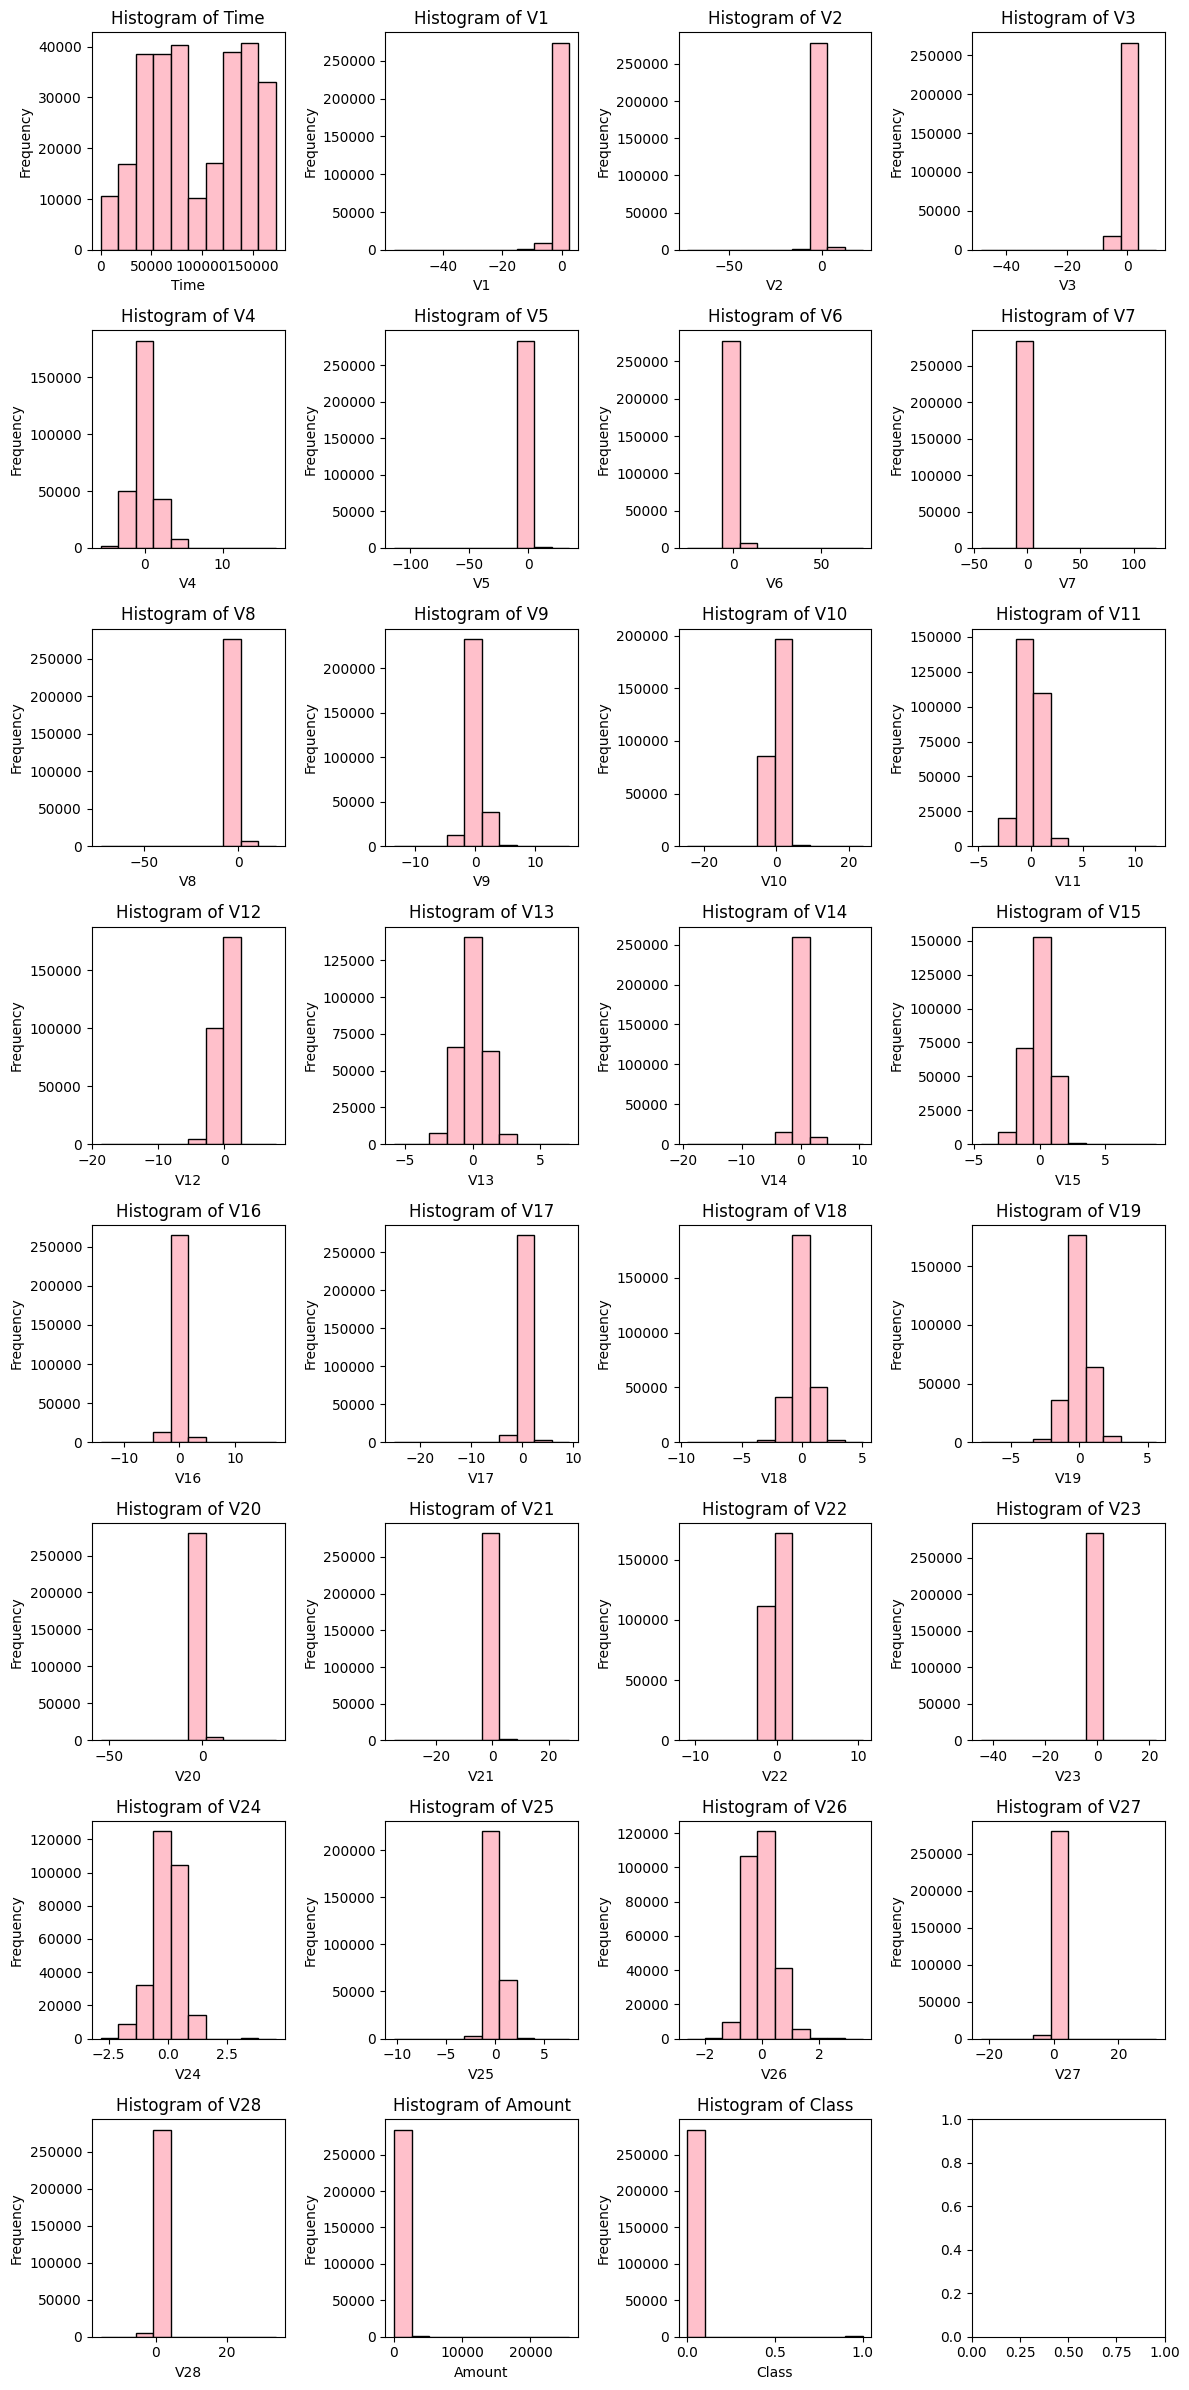

In [ ]:
# vẽ biểu đồ histogram cho từng cột trong DataFrame.
def plot_histograms(df):
    number_cols = len(df.columns)-1
    number_rows = (number_cols + 3) // 4 #số lượng hàng được tính dựa trên số lượng cột
#Thiết lập số hàng và số cột cho dưới biểu đồ
    fig, axes = plt.subplots(number_rows, 4, figsize=(12, number_rows * 3))
#Chạy vòng lặp qua từng cột của DataFrame
    for i, column in enumerate(df.columns):
        ax = axes[i // 4, i % 4]  # Chỉ định vị trí của subplot
        ax.hist(df[column], bins=10 , color = 'pink', edgecolor = 'black')  # Vẽ biểu đồ histogram
        ax.set_xlabel(column)  # Đặt tên trục x là tên cột
        ax.set_ylabel("Frequency")  # Đặt tên trục y là "Frequency"
        ax.set_title(f"Histogram of {column}")  # Đặt tiêu đề cho biểu đồ

    plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplot
    plt.show()  # Hiển thị biểu đồ

#Gọi hàm plot_histogram với DataFrame
plot_histograms(df)

## **Số lượng của từng nhãn (0: Giao dịch không gian lận thẻ tín dụng; 1: Giao dịch có gian lận thẻ tín dụng)**

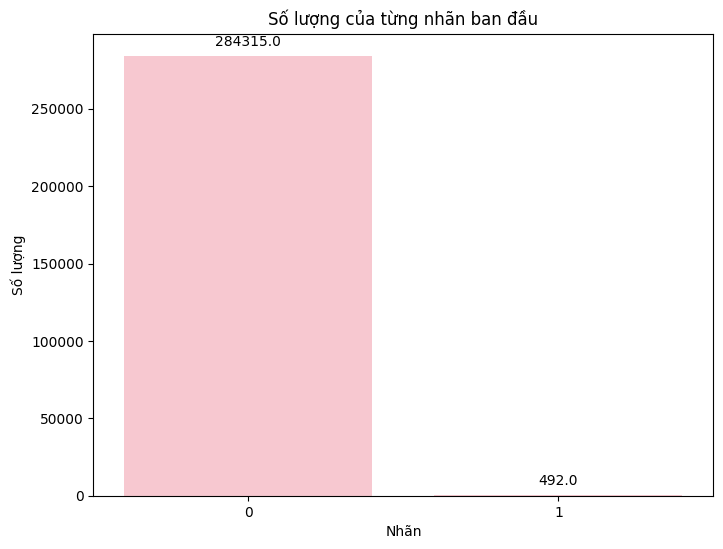

In [ ]:
# Đếm số lần xuất hiện từng giá trị trong cột 'Class'
class_counts = df["Class"].value_counts()
plt.figure(figsize=(8,6))

#vẽ biểu đồ cột sử dụng hàm countplot của thư viện seaborn
axes = sns.countplot(x = 'Class', data = df, order=class_counts.index, color = 'pink')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Số lượng của từng nhãn ban đầu')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
#Thêm nhã số lượng lên trên các cột
for p in axes.patches:
    axes.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Hiển thị biểu đồ
plt.show()


**Nhận xét:** Dữ liệu đang bị mất cân bằng rõ rệt, điều này làm ảnh hưởng đến chất lượng phân loại mô hình, đặc biệt đối với nhãn lớp thiểu số là lớp 1( giao dịch có gian lận trong thẻ tín dụng). Theo đề bài ta thấy, để xây dựng một mô hình xác định gian lận (lớp 1) trong tín dụng một cách chính xác và đúng nhất. Tôi sẽ sử dụng phương pháp cân bằng số lượng giữa 2 lớp trong bài dưới đây.

# **3.Tiền xử lý dữ liệu**

## **a. Kiểm tra dữ liệu bị thiếu**

In [ ]:
Missing_values = df.isnull().sum().sum()
if Missing_values == 0:
    print("Không có dữ liệu bị khuyết")
else:
    print("Tổng số dữ liệu bị khuyết là:", Missing_values)

Không có dữ liệu bị khuyết


## **b. Kiểm tra và xử lí dữ liệu trùng lặp**

In [ ]:
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)

if num_duplicates == 0:
    print("Không có các dòng dữ liệu bị trùng nhau ")
else:
    print("Có", num_duplicates, "dòng trùng lặp với dòng khác")
    print("Thực hiện loại bỏ các dòng trùng lặp...")
    df = df.drop_duplicates()
    print("Độ dài số dòng của dataframe sau khi loại bỏ các dòng trùng lặp : ",len(df))

Có 1081 dòng trùng lặp với dòng khác
Thực hiện loại bỏ các dòng trùng lặp...
Độ dài số dòng của dataframe sau khi loại bỏ các dòng trùng lặp :  283726


## **c.kiểm tra và xử lí dữ liệu ngoại lai**

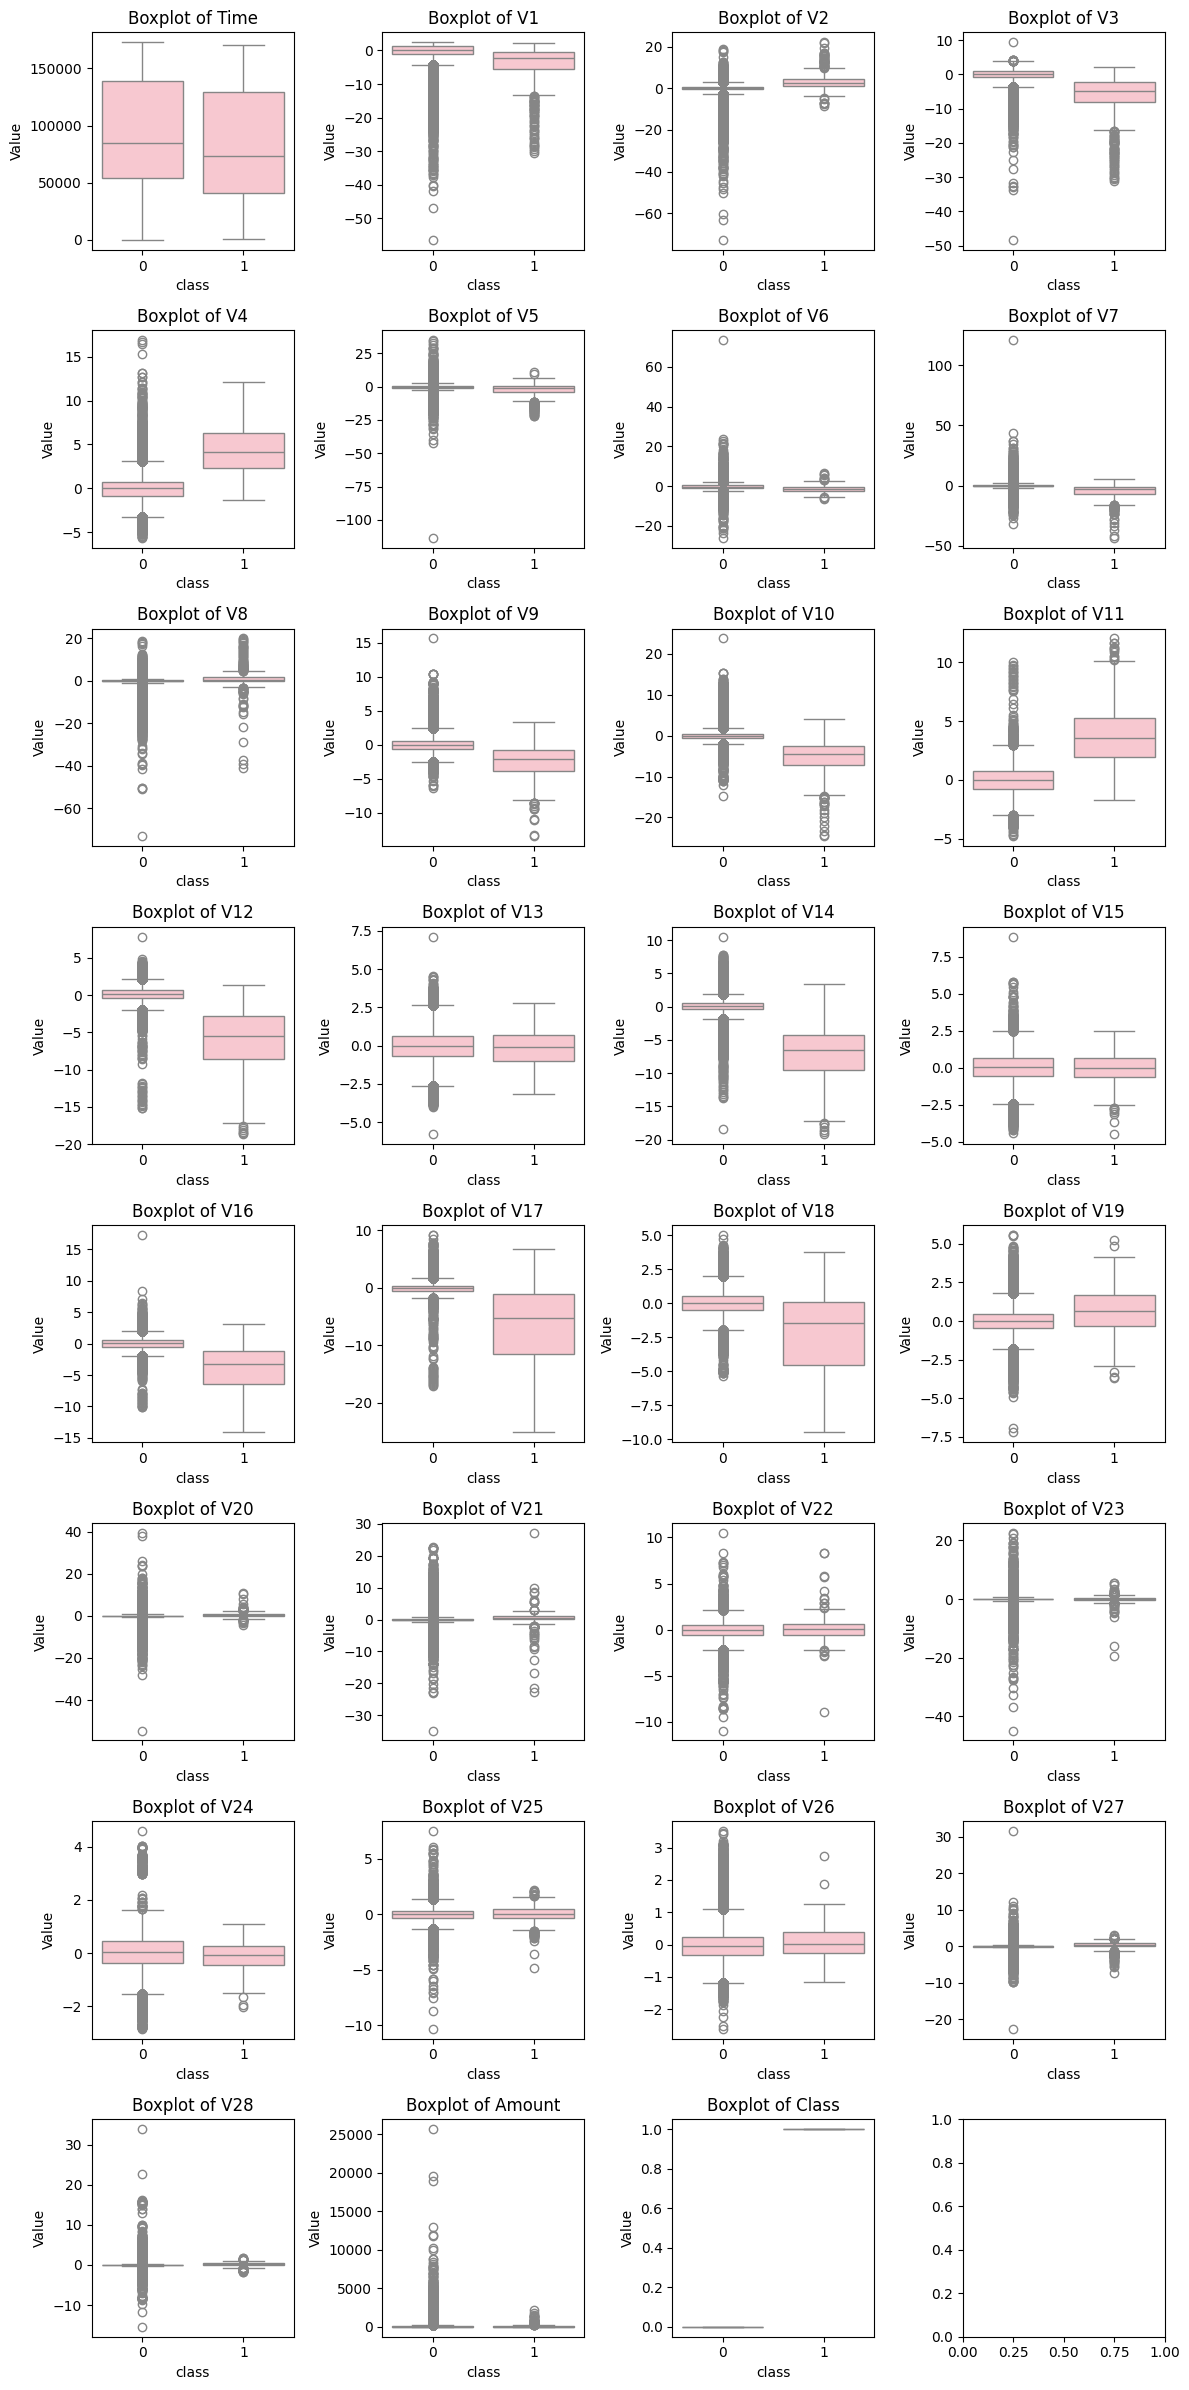

In [ ]:
# Vẽ biểu đồ boxplot với tương ứng 2 nhãn trong cột "class"
def plot_boxplot_with_labels(df):
    num_columns = len(df.columns) - 1 # Loại bỏ cột "class"
    num_rows = (num_columns + 3) // 4  # Số lượng hàng được tính dựa trên số lượng cột

 # Tạo subplot với kích thước và số lượng hàng, cột
    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows*3))

    for i, column in enumerate(df.columns):
        ax = axes[i // 4, i % 4]  # Chỉ định vị trí của subplot

        # Vẽ biểu đồ boxplot với tương ứng 2 nhãn trong cột "class"
        sns.boxplot(x="Class", y=column, data=df, ax=ax, color = 'pink')

        ax.set_xlabel("class")  # Đặt tên trục x là "class"
        ax.set_ylabel("Value")  # Đặt tên trục y là "Value"
        ax.set_title(f"Boxplot of {column}")  # Đặt tiêu đề cho biểu đồ

    plt.tight_layout()  # Tự động điều chỉnh khoảng cách giữa các subplot
    plt.show()  # Hiển thị biểu đồ

# Gọi hàm plot_boxplot_with_labels với DataFrame của bạn
plot_boxplot_with_labels(df)

Xoá outliers cho lớp đa số (lớp 0) bởi vì:
* Ta sẽ tập trung vào lớp thiểu số (lớp 1) bởi vì theo đề bài trên. Bằng cách giữ lại toàn bộ dữ liệu của lớp thiểu số, đảm bảo không mất mát thông tin quan trọng trong quá trình huấn luyện mô hình.
* Cân bằng tỷ lệ giữa 2 lớp, bằng cách chỉ xoá dữ liệu ngoại lai của lớp đa số giúp một phần cân bằng lại tỷ lệ giữa hai lớp và giảm thiểu ảnh hưởng của lớp đa số đến quá trình huấn luyện.

=> Giúp mô hình dự đoán chính xác về các giao dịch gian lận.


In [ ]:
class_0 = df[df['Class'] == 0]
# Vòng lặp lặp qua từng cột (ngoại trừ cột cuối cùng)
for col in df.columns[0:len(df.columns)-1]:
    # Tính toán tứ phân vị
    q1 = class_0[col].quantile(0.25)
    q3 = class_0[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Lọc giá trị
    df = df[(df['Class'] == 1) | ((df['Class'] == 0) & ((df[col] >= lower_bound) & (df[col] <= upper_bound)))]
print("Độ dài số dòng của Dataframe sau khi xử lí Outliers: ",len(df))

Độ dài số dòng của Dataframe sau khi xử lí Outliers:  146063


## **d. tách và chuẩn hoá dữ liệu**

In [ ]:
#Tách dữ liệu thành 2 phần, biến đầu vào và biến nhãn
x = df.drop("Class",axis = 1)
y = df["Class"]

In [ ]:
#Chuẩn hoá dữ liệu các bién đầu vào bằng phương pháp MinMaxscaler
# Chia tỉ lệ
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# **4.Chia dữ liệu thành tệp train và test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,  random_state=42)

## **a. Xử lý mất cân bằng dữ liệu bằng phương pháp ADASYN**

* Phương pháp ADASYN (Adaptive Synthetic Sampling) là phương pháp xử lý mất cân bằng dữ liệu trong bài toán phân loại. Nó là phiên bản cải tiến của thuật toán SMOTE

* Đây là một phương pháp oversampling, có nghĩa là tạo ra các mẫu nhân bản tổng hơp(synthectic samples) cho lớp thiểu số (lớp 1) bằng cách xem xét mức độ mất cân bằng dữ liệu giữa lớp thiểu số và lớp đa số. Nó tập trung vào việc tạo ra các mẫu nhân bản cho các mẫu thiểu số gần biên của lớp đa số, nơi mất cân bằng dữ liệu nhất.

* lý do chọn: do nhãn lớp 1 (giao dịch gian lận) có số lượng ít hơn rất nhiều do với nhãm lớp 0 (giao dịch không gian lận). nếu sử dụng phương pháp undersampling thì dữ liệu sẽ không đủ độ khách quan về thông tin để huấn luyện ra một mô hình chính xác.


In [ ]:
adasyn = ADASYN() # khởi tạo ADASYN từ thư viện imbalanced-learn
X_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

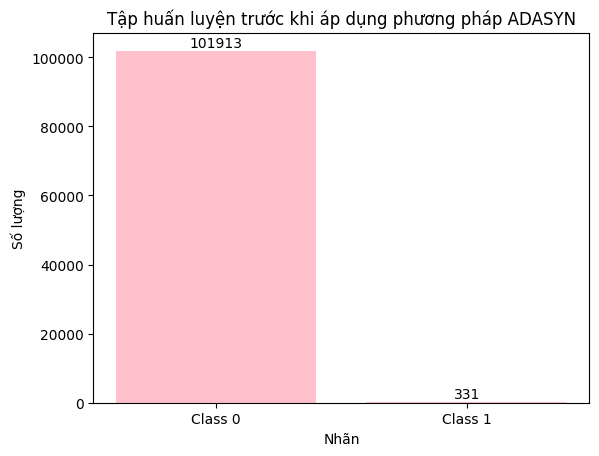

In [ ]:
count_class_0 = len(y_train[y_train == 0])
count_class_1 = len(y_train[y_train == 1])

# Tạo danh sách tên nhãn
labels = ['Class 0', 'Class 1']

# Tạo danh sách số lượng mẫu
counts = [count_class_0, count_class_1]

# Vẽ biểu đồ cột
plt.bar(labels, counts, color = 'pink')
plt.title('Tập huấn luyện trước khi áp dụng phương pháp ADASYN')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Thêm số liệu bên trên mỗi cột
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

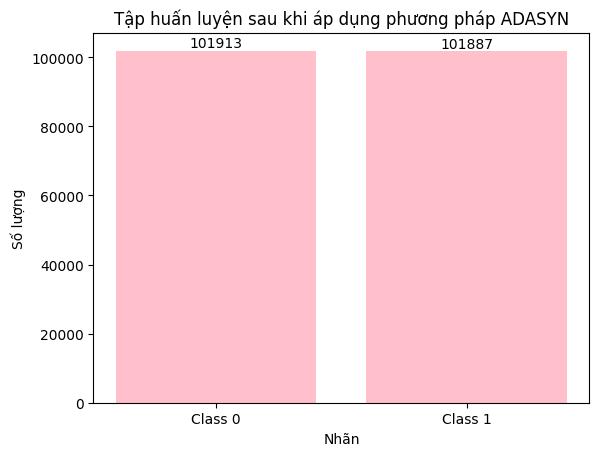

In [ ]:
count_class_0 = len(y_train_resampled[y_train_resampled == 0])
count_class_1 = len(y_train_resampled[y_train_resampled == 1])

# Tạo danh sách tên nhãn
labels = ['Class 0', 'Class 1']

# Tạo danh sách số lượng mẫu
counts = [count_class_0, count_class_1]

# Vẽ biểu đồ cột
plt.bar(labels, counts, color = 'pink')
plt.title('Tập huấn luyện sau khi áp dụng phương pháp ADASYN')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Thêm số liệu bên trên mỗi cột
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom', )

plt.show()

# **5. Huấn luyện mô hình phân lớp**

## **Xây dựng hàm trả về kết quả đánh giá các thông số cho mô hình**

In [ ]:
methodDict ={}
def EvaluateModel(model, y_test, y_pred, plot=False):
    # Trực quan hóa ma trận nhầm lận
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Tính accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)

    # Tính inaccuracy
    print('Classification Error:', 1 - accuracy)

    # Tính những thông số chung
    print('Classification Accuracy:\n', classification_report(y_test, y_pred, digits=5))

    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
    # Lấy giá trị recall của lớp 1
    recall_class_1 = recall[1]

    # Tính giá trị ROC và AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Vẽ đồ thị ROC nếu được yêu cầu
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    # Tính precision và recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Tính AUPRC
    auprc = auc(recall, precision)

    # Vẽ đường cong AUPRC
    if plot:
        plt.figure()
        plt.plot(recall, precision, color='blue', lw=2, label='AUPRC = %0.2f' % auprc)
        plt.fill_between(recall, precision, alpha=0.2, color='blue')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="upper right")
        plt.show()

    # Lưu các keys là tên các mô hình, và values là accuracy_score, recall của lớp 1 và AUC
    methodDict[model.__class__.__name__] = np.array([accuracy * 100, recall_class_1 * 100, roc_auc * 100, auprc * 100])

## **a. Huấn luyện mô hình Logistic regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


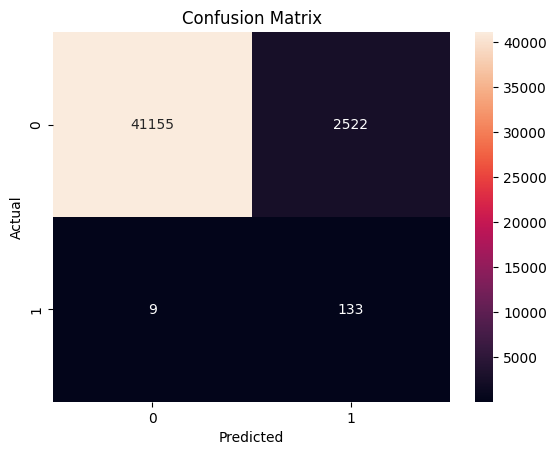

Classification Accuracy: 0.9422396677240467
Classification Error: 0.05776033227595334
Classification Accuracy:
               precision    recall  f1-score   support

           0    0.99978   0.94226   0.97017     43677
           1    0.05009   0.93662   0.09510       142

    accuracy                        0.94224     43819
   macro avg    0.52494   0.93944   0.53263     43819
weighted avg    0.99670   0.94224   0.96733     43819



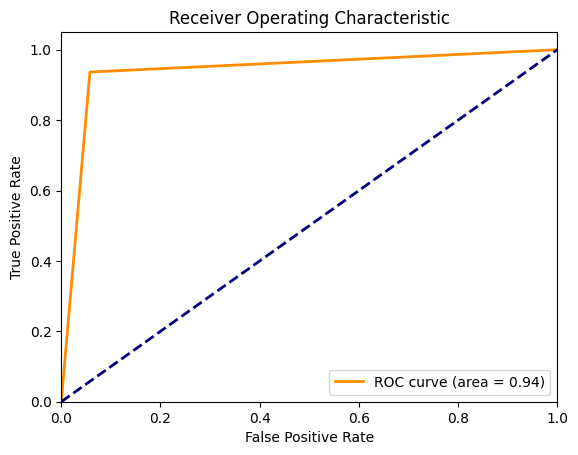

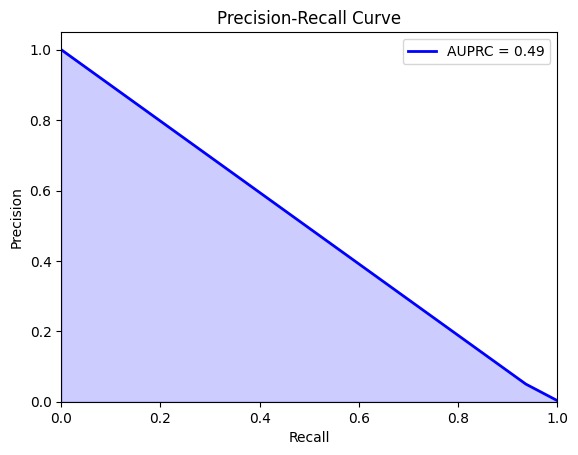

In [ ]:
# chạy mô hình
model_LR = LogisticRegression()
model_LR.fit(X_train_resampled,y_train_resampled)
y_pred = model_LR.predict(x_test)
EvaluateModel(model_LR, y_test, y_pred, plot =True)

**Nhận xét :**
Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

Lớp 0 (Giao dịch không gian lận):
* Precision (độ chính xác): 0.9997. Điều này có nghĩa là 99,97% các dự đoán được xác định là Giao dịch không gian lận là chính xác.

* Recall (độ bao phủ): 0.9442. Điều này cho biết mô hình xác định chính xác 94,42% các giao dịch không gian lận trong số tất cả giao dịch không gian lận thực tế.

* F1-score: 0.9712. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 97,12% cho thấy mô hình có hiệu suất tốt trong việc phân loại giao dịch không gian lận.

Lớp 1 (Giao dịch có gian lận):

* Precision: 0.514. Điều này cho biết 51,4% các dự đoán được xác định là giao dịch gian lận là chính xác.

* Recall: 0.9295. Điều này cho biết mô hình xác định chính xác 92,95% các giao dịch gian lận trong số tất cả khách hàng quay lại thực tế.

* F1-score: 0.097. F1-score của lớp 1 là 9,7%, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại giao dịch gian lận so với giao dịch không gian lận.

Accuracy : 0.9442. Điều này cho biết 94,42% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## **b. Huấn luyện mô hình XGboost**

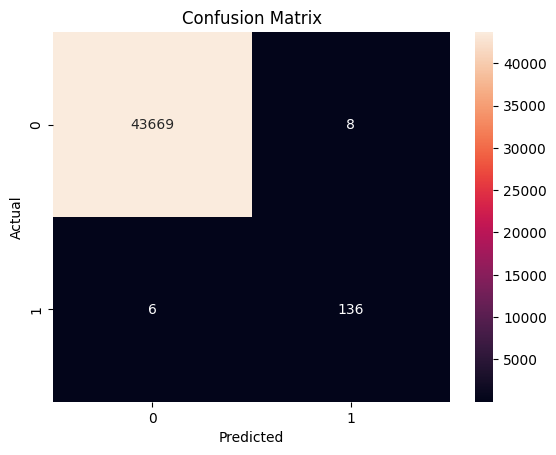

Classification Accuracy: 0.9996805038910062
Classification Error: 0.0003194961089938442
Classification Accuracy:
               precision    recall  f1-score   support

           0    0.99986   0.99982   0.99984     43677
           1    0.94444   0.95775   0.95105       142

    accuracy                        0.99968     43819
   macro avg    0.97215   0.97878   0.97544     43819
weighted avg    0.99968   0.99968   0.99968     43819



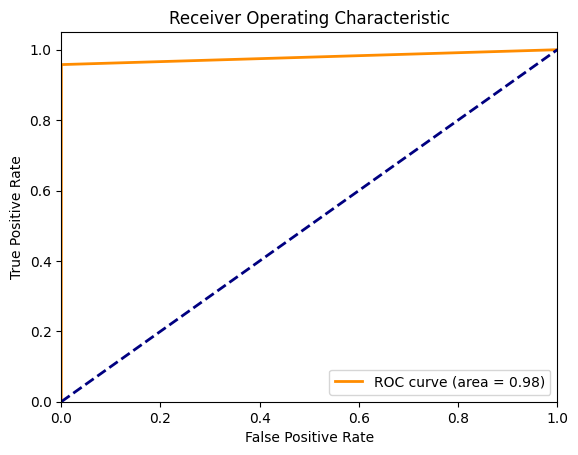

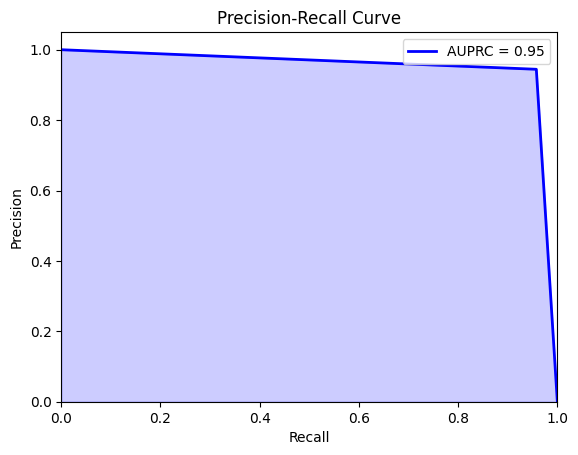

In [ ]:
# chạy mô hình
model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train_resampled,y_train_resampled)
y_pred = model_XGB.predict(x_test)
EvaluateModel(model_XGB, y_test, y_pred, plot =True)

**Nhận xét :**
Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

Lớp 0 (Giao dịch không gian lận):
* Precision (độ chính xác): 0.9999. Điều này có nghĩa là 99,99% các dự đoán được xác định là Giao dịch không gian lận là chính xác.

* Recall (độ bao phủ): 0.99998. Điều này cho biết mô hình xác định chính xác 99,98% các giao dịch không gian lận trong số tất cả giao dịch không gian lận thực tế.

* F1-score: 0.9999. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 99,99% cho thấy mô hình có hiệu suất tốt trong việc phân loại giao dịch không gian lận.

Lớp 1 (Giao dịch có gian lận):

* Precision: 0.9650. Điều này cho biết 96,5% các dự đoán được xác định là giao dịch gian lận là chính xác.

* Recall: 0.9718. Điều này cho biết mô hình xác định chính xác 97,18% các giao dịch gian lận trong số tất cả khách hàng quay lại thực tế.

* F1-score: 0.9684. F1-score của lớp 1 là 96,84%, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại giao dịch gian lận so với giao dịch không gian lận.

Accuracy : 0.8997. Điều này cho biết 99.97% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## **c. Huấn luyện mô hình K-NN**

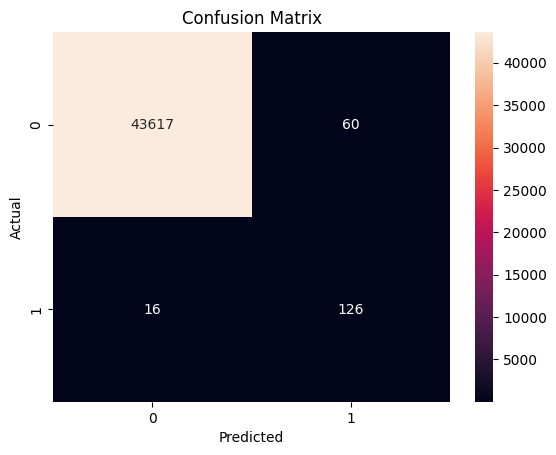

Classification Accuracy: 0.9982655925511764
Classification Error: 0.0017344074488235828
Classification Accuracy:
               precision    recall  f1-score   support

           0    0.99963   0.99863   0.99913     43677
           1    0.67742   0.88732   0.76829       142

    accuracy                        0.99827     43819
   macro avg    0.83853   0.94298   0.88371     43819
weighted avg    0.99859   0.99827   0.99838     43819



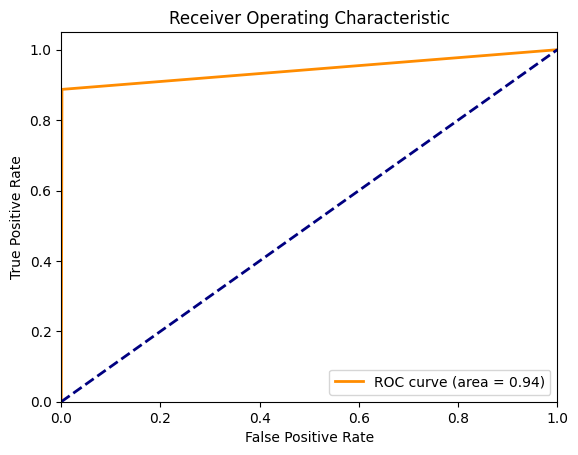

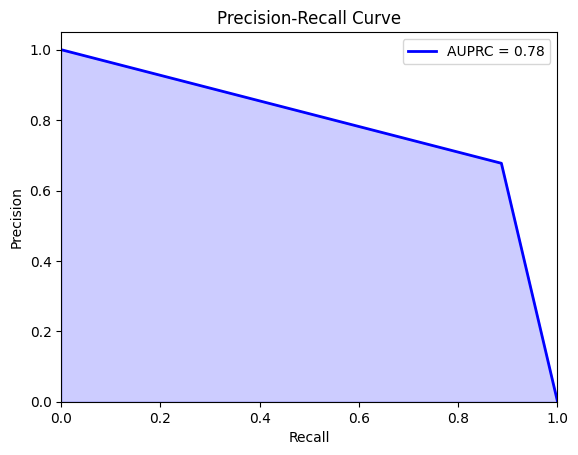

In [ ]:
# chạy mô hình
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_resampled,y_train_resampled)
y_pred = model_KNN.predict(x_test)
EvaluateModel(model_KNN, y_test, y_pred, plot =True)

**Nhận xét :**
Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

Lớp 0 (Giao dịch không gian lận):

* Precision (độ chính xác): 0.9996. Điều này có nghĩa là 99,96% các dự đoán được xác định là Giao dịch không gian lận là chính xác.

* Recall (độ bao phủ): 0.9986. Điều này cho biết mô hình xác định chính xác 99,86% các giao dịch không gian lận trong số tất cả giao dịch không gian lận thực tế.

* F1-score: 0.9991. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 99,91% cho thấy mô hình có hiệu suất tốt trong việc phân loại giao dịch không gian lận.

Lớp 1 (Giao dịch có gian lận):

* Precision: 0.6774. Điều này cho biết 67,74% các dự đoán được xác định là giao dịch gian lận là chính xác.

* Recall: 0.8873. Điều này cho biết mô hình xác định chính xác 88,73% các giao dịch gian lận trong số tất cả khách hàng quay lại thực tế.

* F1-score: 0.7682. F1-score của lớp 1 là 76,82%, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại giao dịch gian lận so với giao dịch không gian lận.

Accuracy : 0.9982. Điều này cho biết 99,82% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

## **d. Huấn luyện mô hình Decision tree**

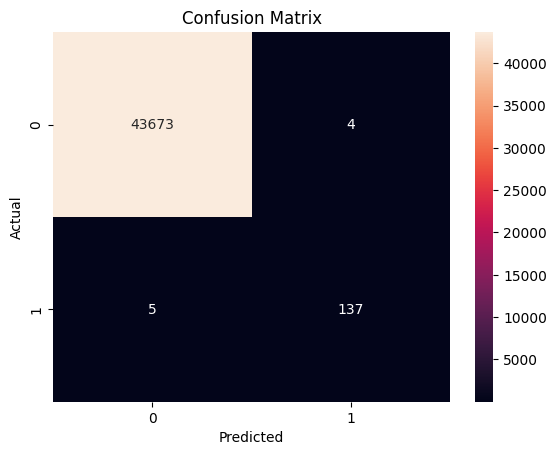

Classification Accuracy: 0.9997946096442183
Classification Error: 0.0002053903557817094
Classification Accuracy:
               precision    recall  f1-score   support

           0    0.99989   0.99991   0.99990     43677
           1    0.97163   0.96479   0.96820       142

    accuracy                        0.99979     43819
   macro avg    0.98576   0.98235   0.98405     43819
weighted avg    0.99979   0.99979   0.99979     43819



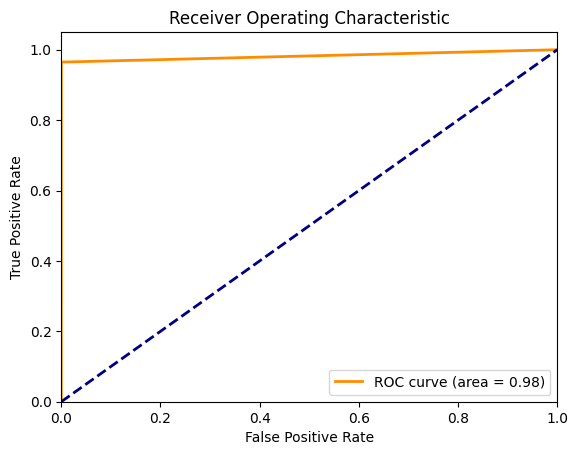

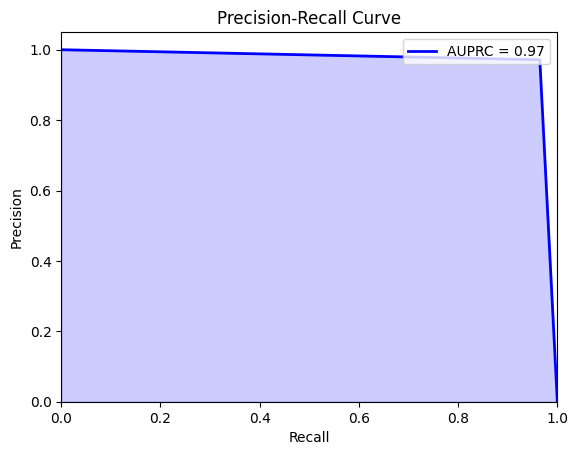

In [ ]:
# chạy mô hình
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train,y_train)
y_pred = model_DT.predict(x_test)
EvaluateModel(model_DT, y_test, y_pred, plot =True)

**Nhận xét :**
Dựa trên kết quả của confusion matrix, ta có các giá trị sau đây:

Lớp 0 (Giao dịch không gian lận):

* Precision (độ chính xác): 0.9998. Điều này có nghĩa là 99,98% các dự đoán được xác định là Giao dịch không gian lận là chính xác.

* Recall (độ bao phủ): 0.9998. Điều này cho biết mô hình xác định chính xác 99,98% các giao dịch không gian lận trong số tất cả giao dịch không gian lận thực tế.

* F1-score: 0.9998. F1-score là một số đo tổng hợp của độ chính xác và độ bao phủ, và giá trị 99,98% cho thấy mô hình có hiệu suất tốt trong việc phân loại giao dịch không gian lận.

Lớp 1 (Giao dịch có gian lận):

* Precision: 0.9513. Điều này cho biết 95,13% các dự đoán được xác định là giao dịch gian lận là chính xác.

* Recall: 0.9647. Điều này cho biết mô hình xác định chính xác 96,47% các giao dịch gian lận trong số tất cả khách hàng quay lại thực tế.

* F1-score: 0.958. F1-score của lớp 1 là 95,8%, cho thấy mô hình có hiệu suất thấp hơn trong việc phân loại giao dịch gian lận so với giao dịch không gian lận.

Accuracy : 0.9997. Điều này cho biết 99,97% các dự đoán của mô hình trên toàn tập dữ liệu là chính xác.

# **6. Đánh giá và lựa chọn mô hình**

**lý do chọn thêm chỉ số recall của lớp 1 ( giao dịch gian lận tín dụng) làm chỉ tiêu đánh giá mô hình:**

Vì mục tiêu của đề bài là: "xây dựng phần mềm nhận diện giao dịch thẻ tín dụng gian lận để đảm bảo khách hàng sử dụng thẻ không bị mất tiền đối với những giao dịch không phải của họ". vậy nên cần xây dựng 1 mô hình có thể dự đoán các giao dịch có gian lận chính xác nhất, đồng nghĩa hạn chế tối đa sai lầm trong việc dự đoán lớp 1 thành lớp 0. Chính vì vậy chỉ số recall lớp 1 càng cao càng tốt (recall lớp 1 bằng số lượng mẫu lớp 1 mà mô hình dự đoán / tổng số lượng mẫu lớp 1 thực tế)



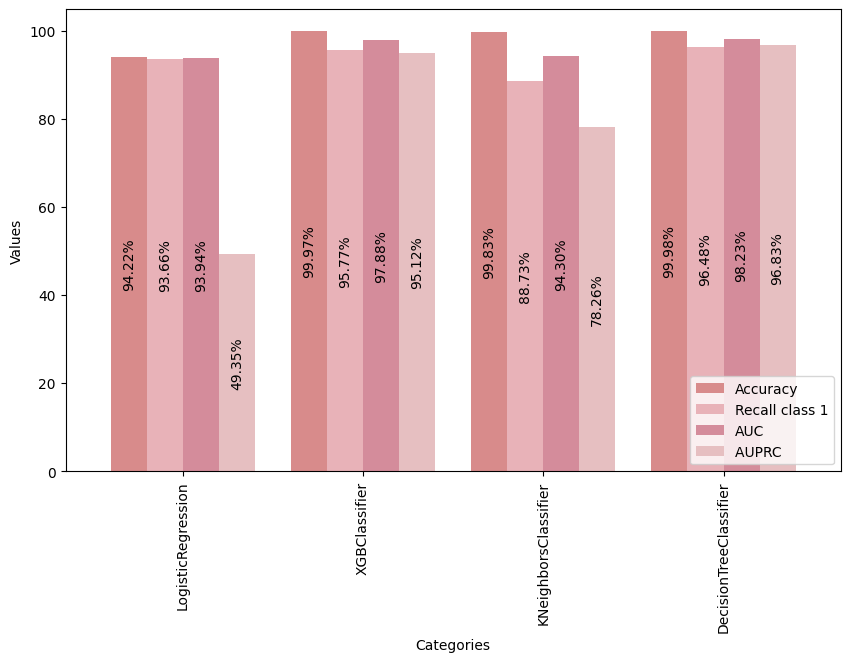

In [ ]:
# Tạo DataFrame từ dictionary
df_method = pd.DataFrame(methodDict)
df_method = df_method.transpose()

# Vẽ biểu đồ unstacked column
ax = df_method.plot(kind='bar', stacked=False, width= 0.8,figsize=(10, 6), color = ["#D88B8B","#E8B2B8","#D48C9B","#E6BFC1"])

# Đặt tên cho trục x và trục y
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend(["Accuracy","Recall class 1","AUC", "AUPRC "],loc='lower right')

# Hiển thị giá trị phần trăm bên trên các cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),
                ha='center', va='center', rotation=90,
                color='black', fontsize=10)

# Hiển thị biểu đồ
plt.show()

**Vậy dựa vào biểu đồ trên ta nhận thấy mô hình có khả năng dự đoán tốt nhất trong việc đáp ứng của mục tiêu phân tích là:**

XGboost model với Accuracy = 99,98%, F1-score class 1 = 97,18%, AUC = 98,59%, AUPRC = 96,85%
